### 로이터 뉴스 분류
- 뉴스 기사 분류: 다중 분류 문제
- 로이터 뉴스를 46개의 토픽으로 분류하는 신경망(다중분류)
- 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 데이터셋(케라스 내장 데이터셋)
- 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋
- 46개의 토픽, 각 토픽은 최소 10개의 샘플이 있음

In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.datasets import reuters

# 로이터 뉴스 데이터 로딩
# num_words 사용할 상위 단어수, maxlen  상위 1000개 단어

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [2]:
x_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [3]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [4]:
len(set(y_train))

46

In [5]:
from tensorflow.keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=50)
x_test = sequence.pad_sequences(x_test, maxlen=50)

In [13]:
x_train[:5]

array([[ 49,   8, 864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22,
        155,  11,  15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,
         11,  15,  22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,
         52,  29, 209,  30,  32, 132,   6, 109,  15,  17,  12],
       [  2,   2,   9,  56,   2,   2,  81,   5,   2,  57, 366, 737, 132,
         20,   2,   7,   2,  49,   2,   2,   2,   2, 699,   2,   8,   7,
         10, 241,  16, 855, 129, 231, 783,   5,   4, 587,   2,   2,   2,
        775,   7,  48,  34, 191,  44,  35,   2, 505,  17,  12],
       [ 80,   2,  46, 905, 220,  13,   4, 346,  48, 235, 629,   5, 211,
          5,   2,   7,   2,  81,   5, 187,  11,  15,   9,   2, 201,   5,
         47,   2,  18, 478,   2,   5,   2,   7, 232,   2,  71,   5, 160,
         63,  11,   9,   2,  81,   5, 102,  59,  11,  17,  12],
       [ 10,   2,   6,   2,  25, 482,  35, 150, 377,   2,   7,  10,   2,
        836,   2,   2,   2,   5,   2,   2,   2,   2,   8,   4, 344, 291,
     

In [6]:
from tensorflow.python.keras.utils import np_utils

# 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

# create the model
model = Sequential()
model.add(Embedding(1000, 100))  
    # 불러온 1000개의 단어가 입력되어 100차원(100개의 숫자)으로 출력
    # input_length=maxlen (50)으로 자동으로 잡힘
    # 임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(LSTM(100))  # long short_Term memory  문장을 단어들의 시퀀스로 간주하고 순환레이어의 입력으로 사용
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 46)                4646      
                                                                 
Total params: 185046 (722.84 KB)
Trainable params: 185046 (722.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)

hist = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# final evaluation of the model
scores_tr = model.evaluate(x_train, y_train, verbose=1)
print('Train Set Accuracy: %.4f'% (scores_tr[1]*100))

scores_ts = model.evaluate(x_test, y_test, verbose=1)
print('Test Set Accuracy: %.4f'% (scores_ts[1]*100))

Epoch 1/100
57/57 [==============================] - 5s 58ms/step - loss: 2.7162 - accuracy: 0.3452 - val_loss: 2.4093 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 3s 50ms/step - loss: 2.3570 - accuracy: 0.3702 - val_loss: 2.2517 - val_accuracy: 0.3962
Epoch 3/100
57/57 [==============================] - 3s 52ms/step - loss: 2.0685 - accuracy: 0.4781 - val_loss: 1.9982 - val_accuracy: 0.4964
Epoch 4/100
57/57 [==============================] - 3s 51ms/step - loss: 1.9061 - accuracy: 0.5201 - val_loss: 1.8037 - val_accuracy: 0.5320
Epoch 5/100
57/57 [==============================] - 3s 48ms/step - loss: 1.7306 - accuracy: 0.5489 - val_loss: 1.7079 - val_accuracy: 0.5526
Epoch 6/100
57/57 [==============================] - 3s 48ms/step - loss: 1.6807 - accuracy: 0.5670 - val_loss: 1.6915 - val_accuracy: 0.5632
Epoch 7/100
57/57 [==============================] - 3s 50ms/step - loss: 1.6030 - accuracy: 0.5915 - val_loss: 1.6273 - val_accuracy: 0.5888
Epoch 

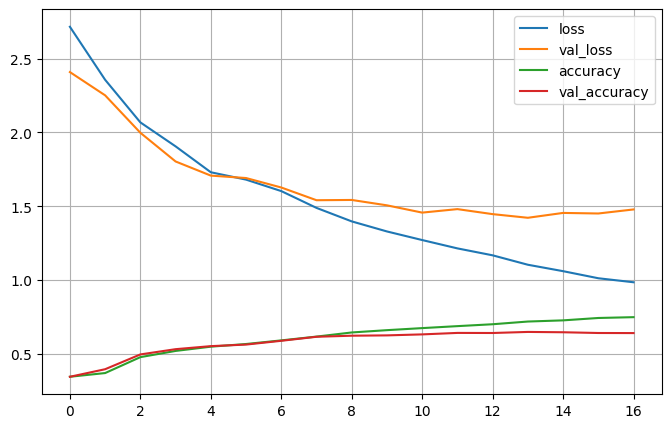

In [12]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [14]:
import numpy as np
pred=model.predict(x_test)
np.argmax(pred[12])

71/71 [==============================] - 1s 7ms/step


1

In [16]:
pred

array([[7.4141845e-04, 1.8923668e-02, 5.3279113e-04, ..., 1.0623600e-04,
        5.6317764e-05, 3.5863701e-04],
       [1.0488603e-02, 4.8614347e-01, 2.3202453e-02, ..., 1.3778405e-03,
        3.0275469e-04, 4.0473376e-04],
       [1.5353782e-02, 1.0961427e-01, 5.0770879e-02, ..., 5.8905743e-03,
        1.2360089e-03, 1.5058999e-03],
       ...,
       [5.9963455e-05, 2.5083316e-03, 5.1882369e-05, ..., 2.6176926e-06,
        2.1222834e-06, 1.3327976e-05],
       [2.2345834e-04, 2.7393093e-03, 8.9836220e-05, ..., 4.1576068e-06,
        6.9940402e-06, 3.5896654e-05],
       [1.5469846e-02, 7.3831552e-01, 3.8878478e-02, ..., 3.8001689e-04,
        1.0784399e-04, 4.9004267e-04]], dtype=float32)

In [15]:
np.argmax(y_test[12])

# 텍스트 클래스 분류할 때에는, 다중분류가 잘 나오기가 어려움 > 이진분류로 해볼 것

1